# 퍼셉트론
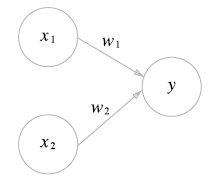
- 퍼셉트론 알고리즘은 여러 개의 신호를 입력으로 받아 하나의 신호를 출력합니다.
- 퍼셉트론은 x와 가중치 w를 곱한 값을 모두 더하여 하나의 값(y)으로 만들어 냅니다. 
- 이때, 활성화 함수를 통해 임곗값(threshold)와 비교하여 출력값을 반환합니다.
  - 활성화함수란? 신경망에서 만들어진 값을 적절할 출력값으로 변환해주는 함수
- 최종 결과값과 우리가 정해놓은 정답과 비교하는데, 특정 알고리즘을 사용하여 최적의 값을 찾을 때까지 가중치를 업데이트하면서 학습을 반복합니다.


## 단층 퍼셉트론

### OR gate

In [ ]:
import tensorflow as tf
tf.random.set_seed(777)
# set_seed() : 고정된 시드값을 설정하는 함수로, 실행할 때마다 같은 결과값을 얻기 위해 사용
# 실험에서 재생산성을 위한 중요한 설정 중 하나

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse  

In [ ]:
# dataset
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

In [ ]:
# Build Model
model = Sequential()

# 단층 퍼셉트론 구성
# Dense층은 퍼셉트론을 자동으로 생성해 줍니다.
# 두 개의 특성을 가지는 1차원의 데이터를 입력으로 받고, 한 개의 출력을 가지는 Dense층(퍼셉트론의 갯수 1)
model.add(Dense(1, input_shape=(2,), activation='linear')) 

# 모델 준비
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])

# 모델 학습
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 294ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9

In [ ]:
# Get Weigth
# weigits와 bias를 반환
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

## 다층 퍼셉트론

### XOR gate
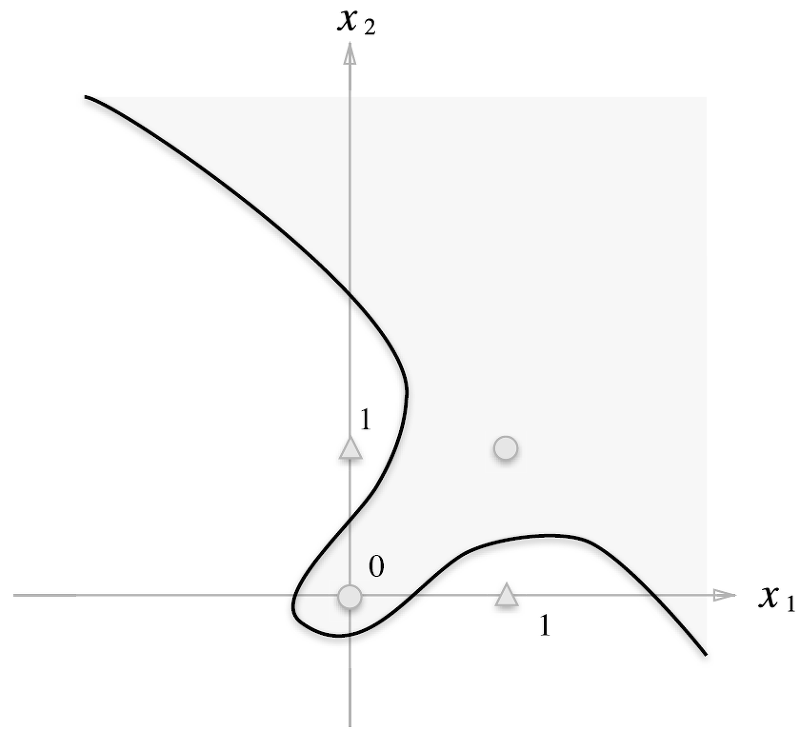
- 단층 퍼셉트론의 한계점은 위 그림과 같이 동그라미와 세모를 구분하는 XOR gate를 해결할 수 없다는 것입니다.
- 이를 다층 퍼셉트론으로 해결할 수 있습니다
  - 여러개의 퍼셉트론을 쌓게 되면 더 많은 가중치를 다뤄야합니다.
  - 퍼셉트론에서 결과값은 입력값과 가중치를 곱해서 다 더한 것이라 했는데, 실제학습에서는 좀 더 단순하고 효율적인 계산을 위해 벡터화를 이용하여 내적을 통해 연산합니다.

In [ ]:
# 벡터 내적
x = tf.random.uniform((10,5)) # uniform 분포에서 해당 크기만큼의 난수 생성
w = tf.random.uniform((5,3))
d = tf.matmul(x,w) # 내적

print(f'x와 w의 벡터 내적의 결과 크기 : {d.shape}')

x와 w의 벡터 내적의 결과 크기 : (10, 3)


In [ ]:
import tensorflow as tf
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [ ]:
data = np.array([[0,0],[1,0],[0,1],[1,1]])
label = np.array([[0],[1],[1],[0]])

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss=mse, metrics=['acc'])
model.fit(data, label, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 588ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 

### Activation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [3]:
# tanh
def tanh(x):
  return list(map(lambda x: math.tanh(x),x))

In [4]:
# ReLU
def relu(x):
  result = []
  for element in x:
    if element <= 0:
      result.append(0)
    else:
      result.append(element)
  return result

Text(0.5, 1.0, 'y = ReLU(x)')

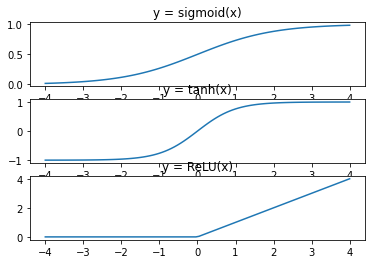

In [5]:
# 함수 그려보기
x = np.linspace(-4, 4, 100)
sigmoid = sigmoid(x)
tanh = tanh(x)
relu = relu(x)

plt.subplot(311)
plt.plot(x, sigmoid)
plt.title('y = sigmoid(x)')

plt.subplot(312)
plt.plot(x, tanh)
plt.title('y = tanh(x)')

plt.subplot(313)
plt.plot(x, relu)
plt.title('y = ReLU(x)')

## 경사하강법 (Gradient Descent)
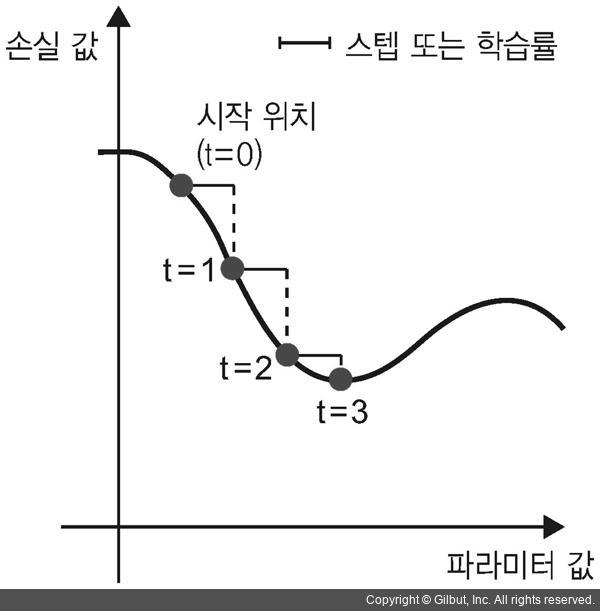
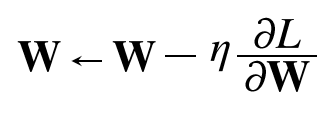
- 신경망은 가중치를 업데이트하면서 주어진 문제를 최적화합니다.
- 딥러닝은 예측값과 실제값의 차이를 손실함수로 나타내는데, 손실함수의 최솟값을 찾는 것이 오차를 최소화하는 것입니다. 그래서 경사하강법을 이용해 어떤 값에서 함수가 최소값을 갖는지 찾아내는 것입니다.
  - 경사하강법이란? 특정 함수에서의 미분을 통해 얻은 기울기를 이용하여 최적의 값을 찾아가는(손실을 줄이는) 방법 => 기울기를 이용해 x를 어디로 옮겨야 함수가 최소값을 갖는지?
  - W(new) = W - lr*(∂L/∂W)
    - lr(learning rate) : 학습률, 모델의 학습에서 학습 속도나 성능에 큰 영향을 끼치는 중요한 hyper parameter
    - 초기 lr = 0.001(1e-3) , 어느 정도 학습후 lr을 줄여나가거나, 급격히 키우고 다시 줄이는 방법
  - 기울기를 타고 내려가는데, 어떤 위치에서 시작하냐에 따라 최솟값이 잘 나오거나, 지역 최솟값에 빠질 위험이 있습니다.
    - 가중치 초기화
      - ex) Glorot(Xavier), he, Lecun 초기화(tf.keras.initializers)
  - 경사하강법은 항상 최적값을 반환한다는 보장을 할 수 없기 때문에 여러가지 학습률을 사용해볼 필요가 있습니다.
    - 학습률이 너무 높으면 학습이 되지 않을 수 있고, 낮으면 학습속도가 아주 느려서 전역 최솟값에 도달하기 전에 학습이 종료될수 있기 때문에

## 확률적 경사하강법 (SGD:Stochastic Gradient Descent)
- 배치 단위를 사용하여 학습을 진행
    

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 여러가지 학습률
lr_list = [0.001, 0.1, 0.5, 0.9]

In [8]:
def get_derivative(lr):
  w_old = 2
  derivative = [w_old]

  y = [w_old**2] # 손실함수 y=x^2

  for i in range(1,10):
    dev_value = w_old*2 # 해당위치에서의 미분값
    w_new = w_old-(lr*dev_value)
    w_old = w_new

    derivative.append(w_old) # 업데이트된 가중치 저장
    y.append(w_old**2) # 업데이트된 가중치의 손실값 저장

  return derivative, y

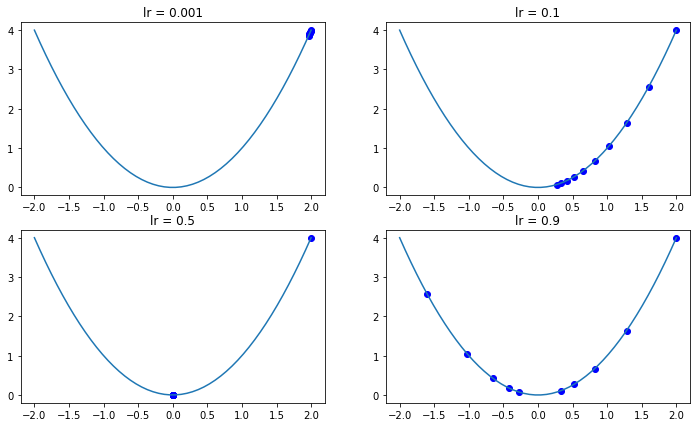

In [9]:
x = np.linspace(-2, 2, 50)
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12,7))

for i, lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2,2,i+1)
  ax.scatter(derivative, y, color='blue')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))
plt.show()

## 역전파
- 주어진 문제를 해결하기 위해 구성한 모델에서 수많은 가중치를 무작위로 설정한 뒤 결괏값을 도출하고, 이를 정답과 비교하여 가중치를 다시 조정하는 과정에서 사용합니다.
- 체인룰
  - 가중치를 업데이트하는 과정에서 체인룰을 사용하게 됨으로써, 계산량이 줄어들어 더 빠른 속도로 모델을 학습시킬수 있게 되었습니다.